# 11 Year Train

# How does the number of epochs of training affect model performance?

In [1]:
import torch
import random
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm, skewnorm, skew

In [2]:
seed = 633

print("[ Using Seed : ", seed, " ]")

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

[ Using Seed :  633  ]


In [3]:
from koopman_probabilistic import *
from model_objs import *
import vanilla_benchmark

## Pinball Loss

In [4]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [5]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

# Load data

In [6]:
import json

with open("GEFCom2017\\GEFCom2017-Qual\\GEFCom2017QualAll.json") as f:
    all_data = json.loads(f.read())

In [7]:
zone_name = "ME"
# rescale data
data = np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64).T
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)

data (113952, 1)


In [8]:
dates = np.array(list(map(pd.Timestamp, all_data["ISONE CA"]["Date"])))

In [9]:
test_start_date = pd.Timestamp("2017-11-01 00:00:00")
test_start = np.argwhere(dates == test_start_date)[0, 0]
test_length = 31 * 24

In [10]:
delay_delta = pd.Timedelta(days=52)
delay = delay_delta.days * 24
train_end_date = test_start_date - delay_delta
train_start_date = train_end_date.replace(year=train_end_date.year - 11)
train_start = np.argwhere(dates == train_start_date)[0, 0]
train_length_delta = train_end_date - train_start_date
train_through = train_length_delta.days * 24
pre_length_delta = train_length_delta / 2 # the length of time at the beginning of the trianing period to hide from mu
pre_length = pre_length_delta.days * 24

# Test

In [15]:
cumul_iters = np.array([0, 2, 10, 25, 50, 100, 150])
iter_steps = cumul_iters[1:] - cumul_iters[:-1]

In [12]:
%matplotlib inline
z_scores_lists = []
test_z_scores_lists = []
losses_lists = []
relative_perfs = []

TRAIN START: 14808 = 2006-09-10 00:00:00
x (98424, 1)
xt (96432, 1)
working on 2 ...
2
Final loss: 0.312722784375532


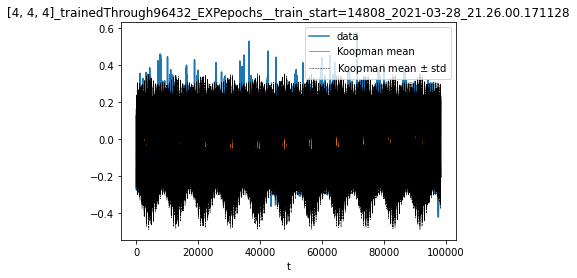

actual overall mean: 0  predicted mean: -0.025030192


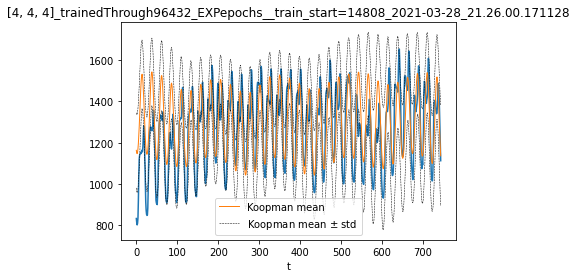

pinball_loss: 41.679337709203224
-47.69432214458975% performance relative to vanilla benchmark





working on 10 ...
8
Final loss: -1.3473519592187866


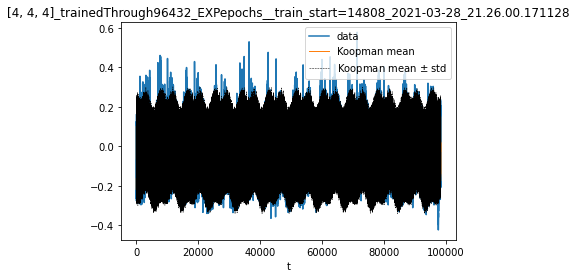

actual overall mean: 0  predicted mean: -0.023831235


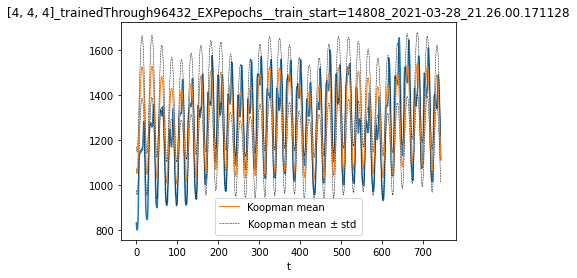

pinball_loss: 33.781729494549836
-19.70846737969467% performance relative to vanilla benchmark





working on 25 ...
15
Loss at iteration 10: -1.636781483357162
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
Final loss: -1.6599222287380067


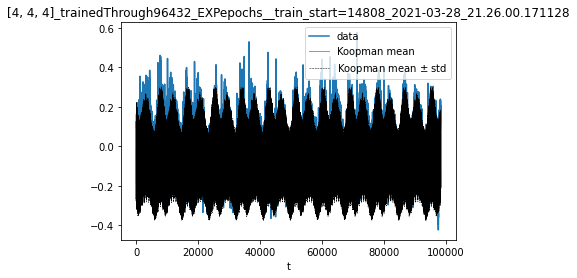

actual overall mean: 0  predicted mean: -0.023979565


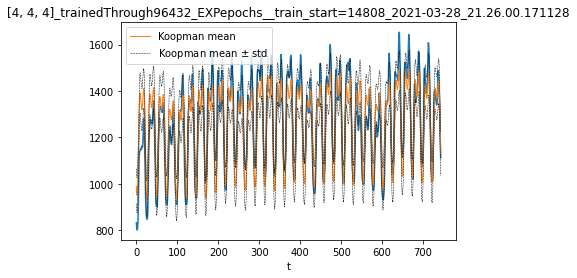

pinball_loss: 23.50736533414691
16.69962673938018% performance relative to vanilla benchmark





working on 50 ...
25
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BAT

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
Loss at iteration 10: -1.6858928993965518
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical i

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

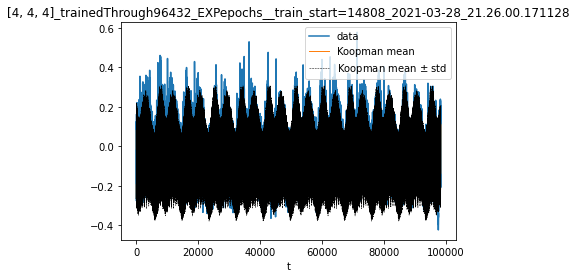

actual overall mean: 0  predicted mean: -0.024175948


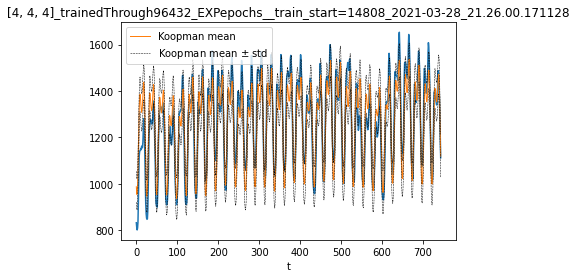

pinball_loss: 22.188785819194294
21.372126792366075% performance relative to vanilla benchmark





working on 100 ...
50
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS 

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

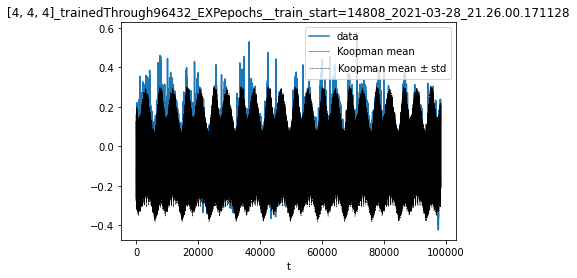

actual overall mean: 0  predicted mean: -0.023975322


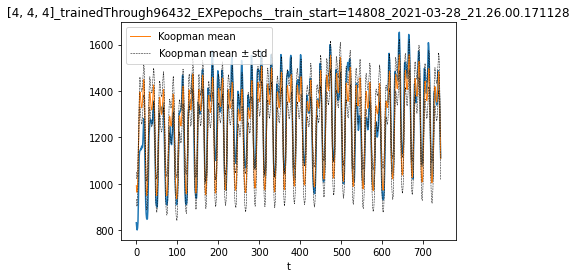

pinball_loss: 22.213295035636186
21.285276273436615% performance relative to vanilla benchmark





working on 150 ...
50
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS 

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPRO

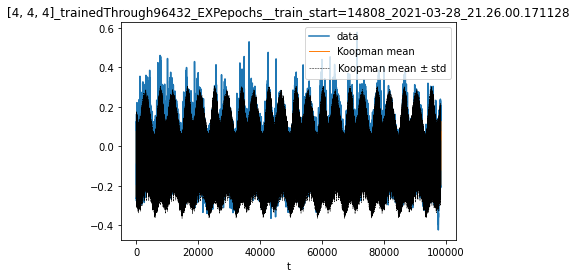

actual overall mean: 0  predicted mean: -0.024003154


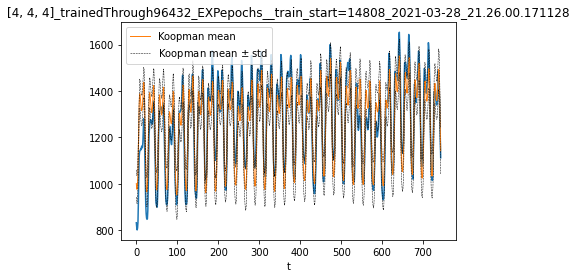

pinball_loss: 23.42324402035942
16.997717858400353% performance relative to vanilla benchmark





working on 200 ...
50
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)
THIS BATCH USING LOG CDF APPROXIMATION (large z-score can otherwise cause numerical instability)


KeyboardInterrupt: 

In [13]:
z_scores_lists.append([])
test_z_scores_lists.append([])
losses_lists.append([])
relative_perfs.append([])

print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
predict_through = train_through + delay + test_length
x = data[train_start:]
x = x[:predict_through]
xt = x[:train_through]
mask = torch.ones(xt.shape, dtype=torch.uint8)
mask[:pre_length] = 0
num_freqs = [4, 4, 4]
num_fourier = 4
loss_weights = 1 + 0.4 * torch.cos(torch.linspace(0, 11 * 2 * np.pi, xt.shape[0]))
loss_weights *= 1/(1 + torch.exp((3*xt.shape[0] / 4 - torch.arange(xt.shape[0])) / (xt.shape[0] / 10))) + 0.5
loss_weights[:pre_length] = 1
print("x", x.shape)
print("xt", xt.shape)

now = ("_".join(str(datetime.now()).split())).replace(":", ".")

### TRAIN ###
model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=256)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32, loss_weights=loss_weights)

k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.24])
data_name = "EXPepochs_" + f"_train_start={train_start}_" + now

for i, iters in enumerate(iter_steps):
    print("working on", cumul_iters[i+1], "...")
    print(iters)

    k.fit(xt, iterations=iters, verbose=False, cutoff=0, weight_decay=1e-3, lr_theta=1e-4, lr_omega=0, training_mask=mask);

    fname = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{cumul_iters[i+1]}soFar_{num_freqs}"
    mu_file = fname + "mu.npy"
    sigma_file = fname + "sigma.npy"
    alpha_file = fname + "alpha.npy"    

    ### FORECAST ###
    params = k.predict(predict_through)
    mu_hat, sigma_hat, a_hat = params
    
    mean_hat = model.mean(params)
    std_hat = model.std(params)
    
    # ADD TO CORRECT BIAS                                                    
    adjust = np.mean((xt[-365*24:] - mean_hat[train_through - 365*24:train_through]) / std_hat[train_through - 365*24:train_through]) / (np.mean(1 / std_hat[train_through - 365*24:train_through]))
    mu_hat += adjust
    np.save(mu_file, mu_hat)
    np.save(sigma_file, sigma_hat)
    np.save(alpha_file, a_hat)

    mean_hat = model.mean(params)
    std_hat = model.std(params)

    dim = 0
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

    ### ANALYTICS ###
    print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

    z_scores_lists[-1].append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
    test_z_scores_lists[-1].append(
        (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
         / std_hat[train_through + delay:predict_through])

    ### PERFORMANCE ###

    #Skew-Normal distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
    test_start = train_through + delay
    sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
    delta = ah / (1 + ah ** 2) ** 0.5
    muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    sigh = sigh * rnge
    mean_hat = model.mean([muh, sigh, ah])
    std_hat = model.std([muh, sigh, ah])

    plt.figure()
    plt.plot(x_original[train_start:][test_start: predict_through])
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

    loss = skew_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh, ah)[0]
    relative = (1 - loss/28.22) * 100
    print("pinball_loss:", loss)
    print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
    losses_lists[-1].append(loss)
    relative_perfs[-1].append(relative)

# Figures

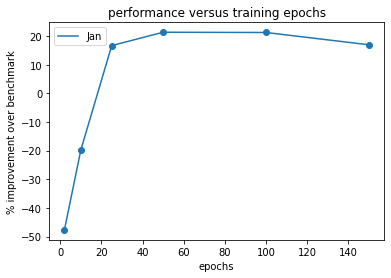

In [16]:
plt.figure()
plt.plot(cumul_iters[1:], relative_perfs[0], label="Jan")
plt.scatter(cumul_iters[1:], relative_perfs[0])
plt.legend()
plt.title("performance versus training epochs")
plt.xlabel("epochs")
plt.ylabel("% improvement over benchmark")
plt.show()

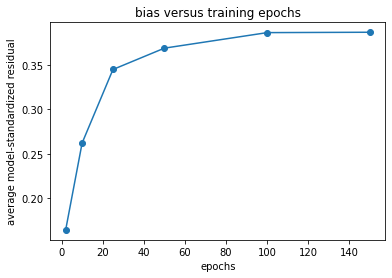

In [17]:
plt.figure()
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[0], axis=1))
plt.title("bias versus training epochs")
plt.xlabel("epochs")
plt.ylabel("average model-standardized residual")
plt.show()

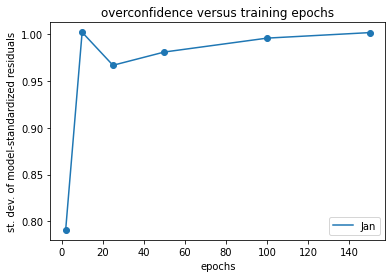

In [18]:
plt.figure()
plt.plot(cumul_iters[1:], np.std(z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[0], axis=1))

plt.legend()
plt.title("overconfidence versus training epochs")
plt.xlabel("epochs")
plt.ylabel("st. dev. of model-standardized residuals")
plt.show()

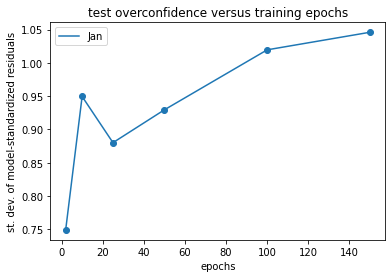

In [22]:
plt.figure()
plt.plot(cumul_iters[1:], np.std(test_z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.std(test_z_scores_lists[0], axis=1))

plt.legend()
plt.title("test overconfidence versus training epochs")
plt.xlabel("epochs")
plt.ylabel("st. dev. of model-standardized residuals")
plt.show()

In [21]:
# for tables
for loss in losses_lists[:6]:
    print(np.round(loss, 1), end="\t")
print("")
for rel in relative_perfs[:6]:
    print(np.round(rel, 1), end="%\t")

[41.7 33.8 23.5 22.2 22.2 23.4]	
[-47.7 -19.7  16.7  21.4  21.3  17. ]%	

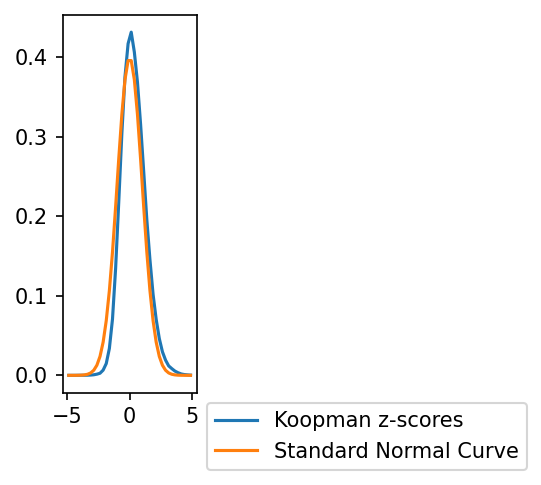

In [23]:
%matplotlib inline
plt.subplots(dpi=150, figsize=(8, 6))
for i, z_scores in enumerate(z_scores_lists):
    month = 2*i
    z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
    z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
#     print(f"mean of z-scores in month {months[month]}:", np.mean(z_scores), "std of z-scores:", np.std(z_scores))
    
    plt.subplot(2, 3, i + 1)
    plt.plot(z_axis, z_hist, label="Koopman z-scores")
    plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
#     plt.title(months[month])
#     plt.xlabel("z")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

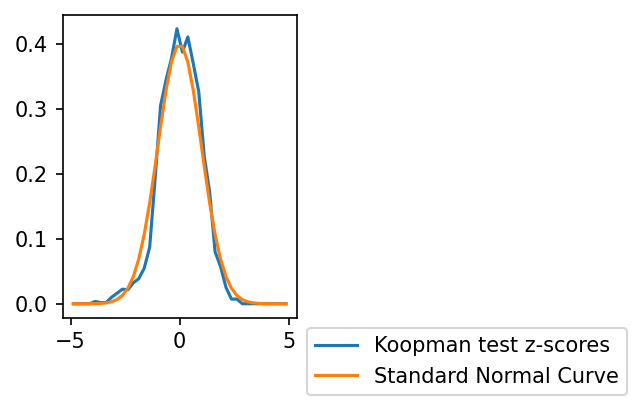

In [24]:
%matplotlib inline
plt.subplots(dpi=150, figsize=(10, 5))
for i, z_scores in enumerate(test_z_scores_lists):
    month = 2 * i
    z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
    z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
#     print(f"mean of z-scores in month {month}:", np.mean(z_scores), "std of z-scores:", np.std(z_scores))
    
    plt.subplot(2, 3, i + 1)
    plt.plot(z_axis, z_hist, label="Koopman test z-scores")
    plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
#     plt.title(months[month])
#     plt.xlabel("z")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

In [16]:
idx = 6
for z_scores in z_scores_list[:idx]:
    print(np.round(np.mean(z_scores), 2), end="\t")
print()
for z_scores in z_scores_list[:idx]:
    print(np.round(np.std(z_scores), 2), end="\t")
print()
for z_scores in z_scores_list[:idx]:
    print(np.round(skew(z_scores)[0], 2), end="\t")
print()
for z_scores in test_z_scores_list[:idx]:
    print(np.round(np.mean(z_scores), 2), end="\t")
print()
for z_scores in test_z_scores_list[:idx]:
    print(np.round(np.std(z_scores), 2), end="\t")
print()
for z_scores in test_z_scores_list[:idx]:
    print(np.round(skew(z_scores)[0], 2), end="\t")

0.1	
1.06	
0.41	
1.14	
1.8	
0.91	

In [19]:
z_scores_lists = np.array(z_scores_lists)
test_z_scores_lists = np.array(test_z_scores_lists)
losses_lists = np.array(losses_lists)
relative_perfs = np.array(relative_perfs)

In [20]:
np.save(data_name + "z_scores_lists.npy", z_scores_lists)
np.save(data_name + "test_z_scores_lists.npy", test_z_scores_lists)
np.save(data_name + "relative_perfs.npy", relative_perfs)
np.save(data_name + "losses_lists.npy", losses_lists)